In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

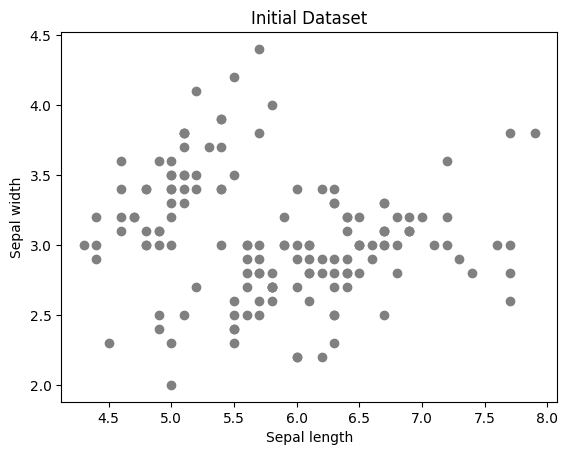

In [2]:
iris_dataset = load_iris()
data = iris_dataset.data
data = data[:,:2]

plt.scatter(data[:,0], data[:,1], c='gray')
plt.title("Initial Dataset")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

In [3]:
class KMeans:
    def __init__(self, n_clusters=3, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.clusters = None

    def initialize_centroids(self, data):
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.n_clusters, replace=False)]

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2)**2))

    def assign_clusters(self, data):
        distances =  np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)

    def update_centroids(self, data):
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.n_clusters)])

    def fit(self, data):
        self.initialize_centroids(data)
        for i in range(self.max_iter):
            self.clusters = self.assign_clusters(data)

            self.plot_clusters(data, i)

            new_centroids = self.update_centroids(data)
            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

        self.plot_final_clusters(data)


    def plot_clusters(self, data, iteration):
        plt.scatter(data[:,0], data[:,1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:,0], self.centroids[:,1], c='red', s=300, marker='x')
        plt.title(f"Iteration {iteration}")
        plt.xlabel("Sepal length")
        plt.ylabel("Sepal width")
        plt.show()


    def plot_final_clusters(self, data):
        plt.scatter(data[:,0], data[:,1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:,0], self.centroids[:,1], c='red', s=300, marker='x')
        plt.title("Final Clusters")
        plt.xlabel("Sepal length")
        plt.ylabel("Sepal width")
        plt.show()


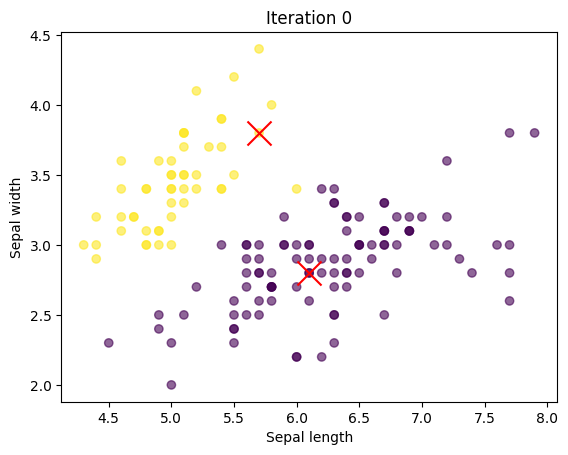

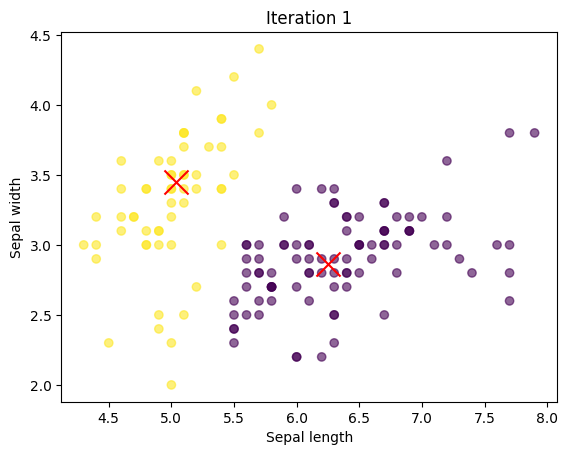

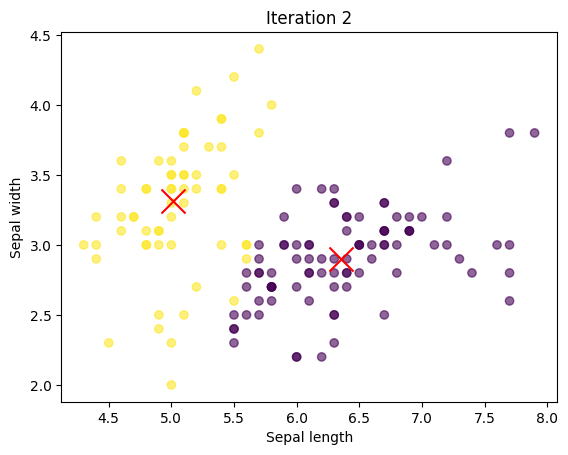

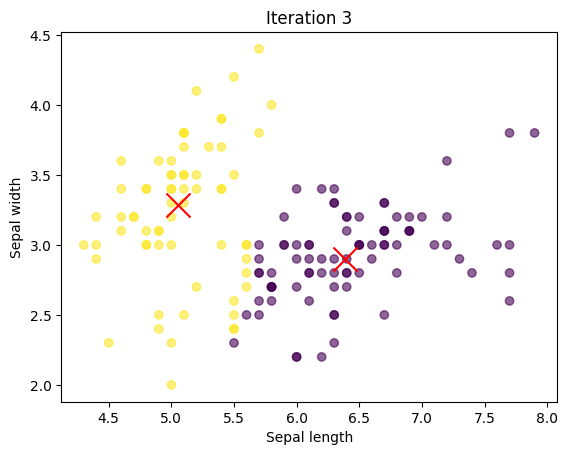

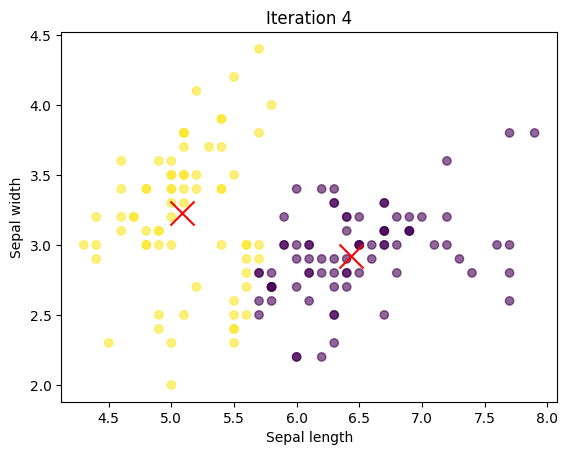

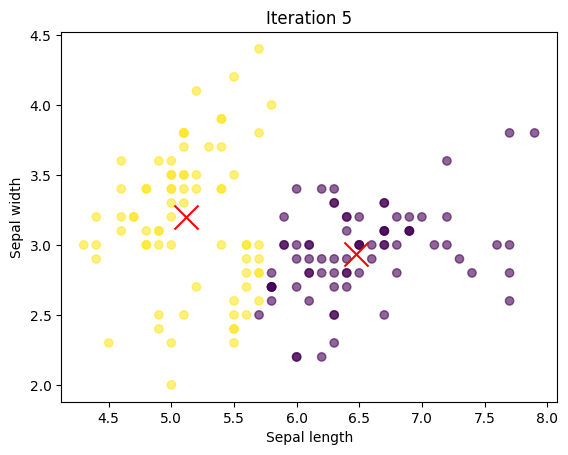

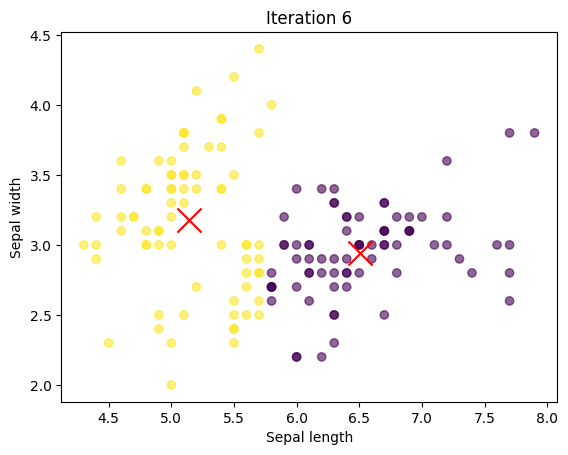

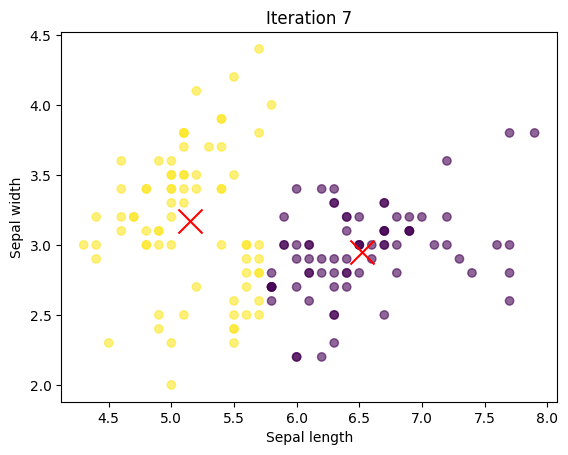

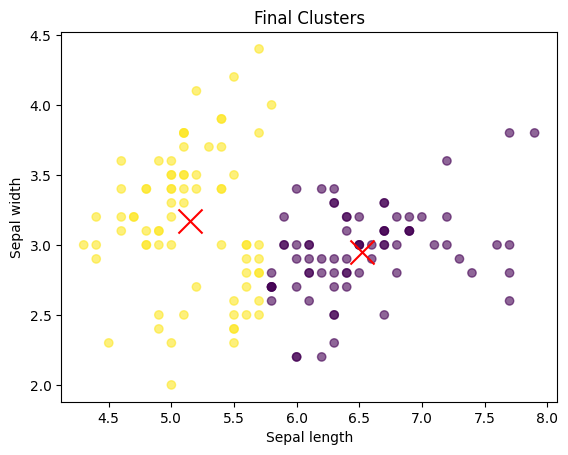

In [4]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

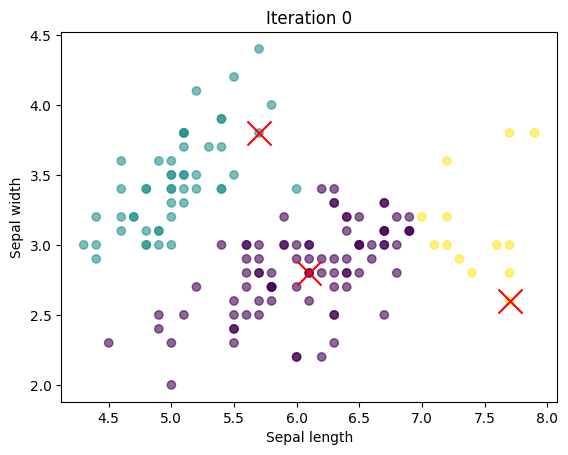

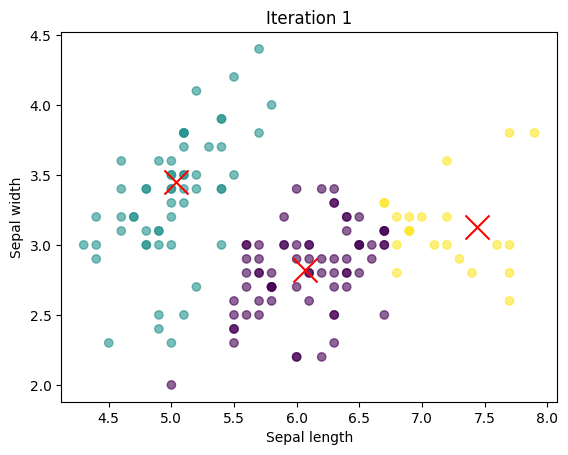

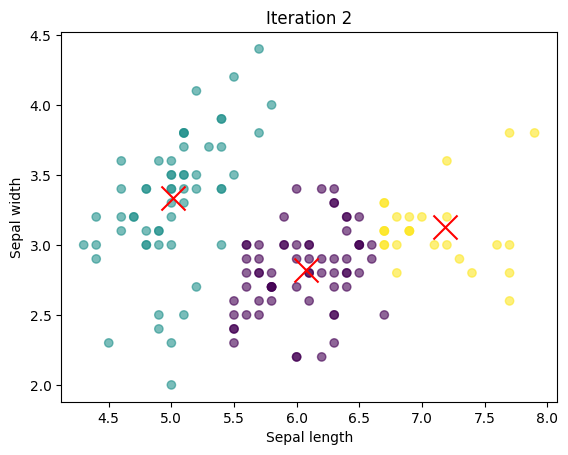

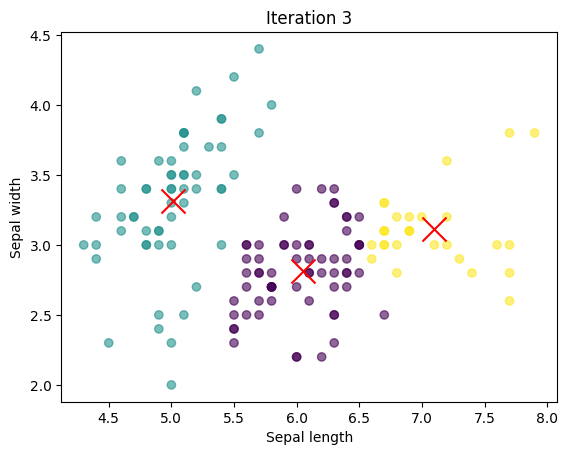

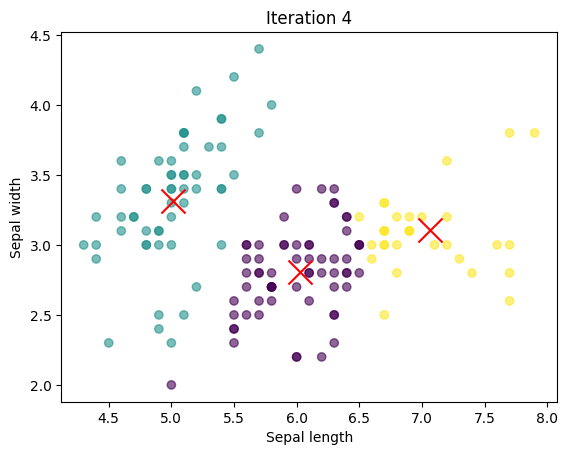

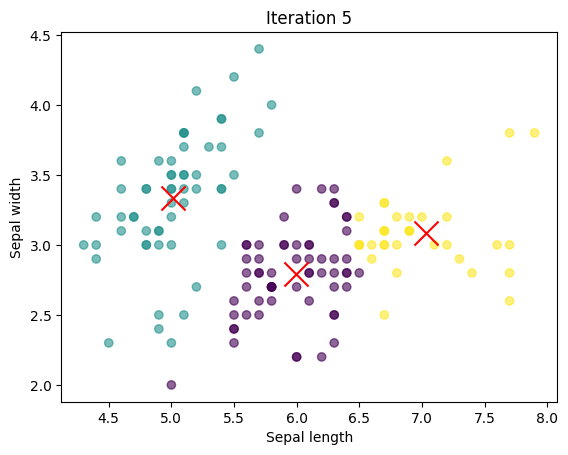

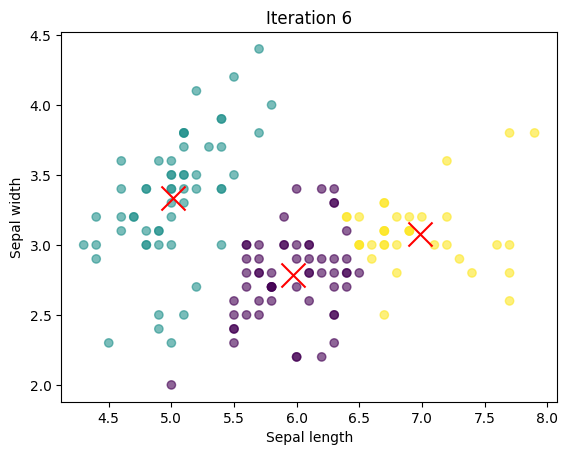

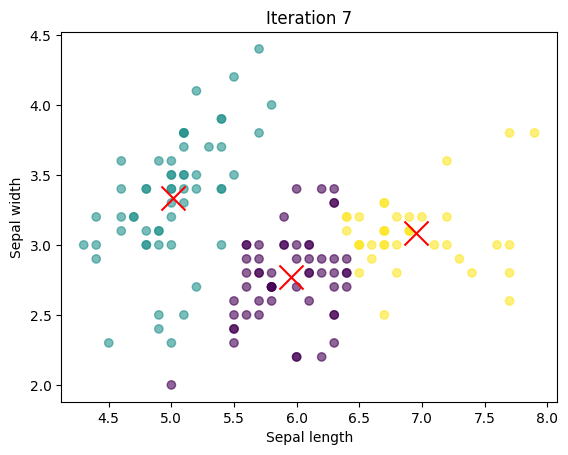

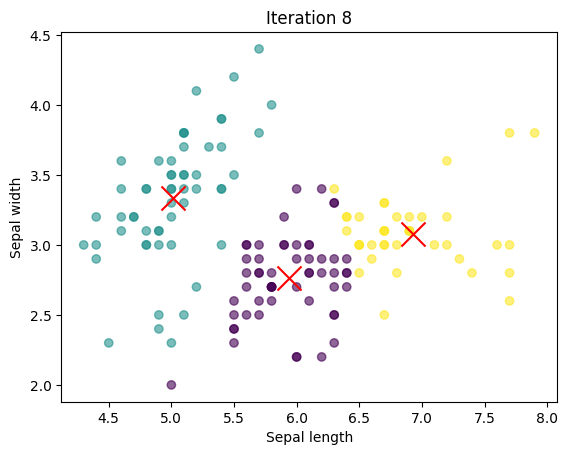

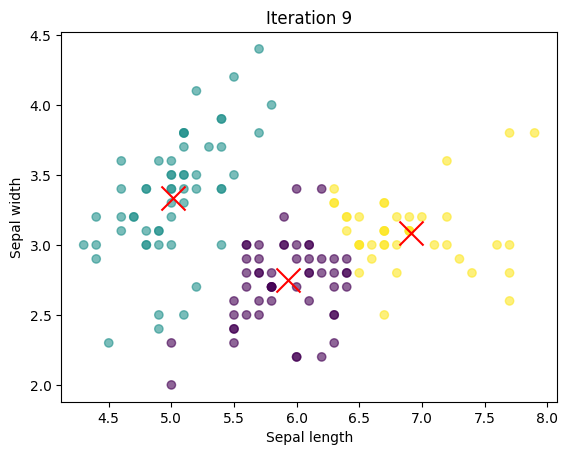

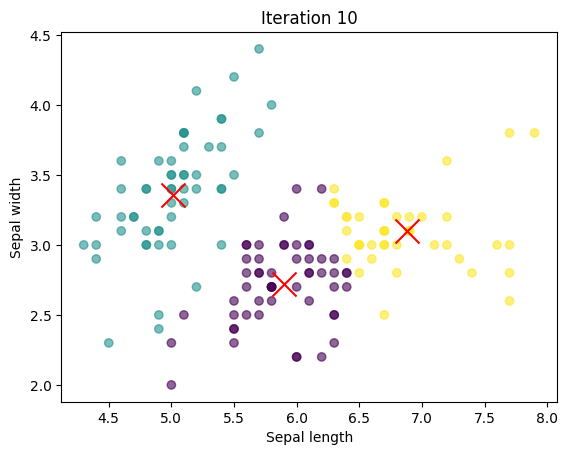

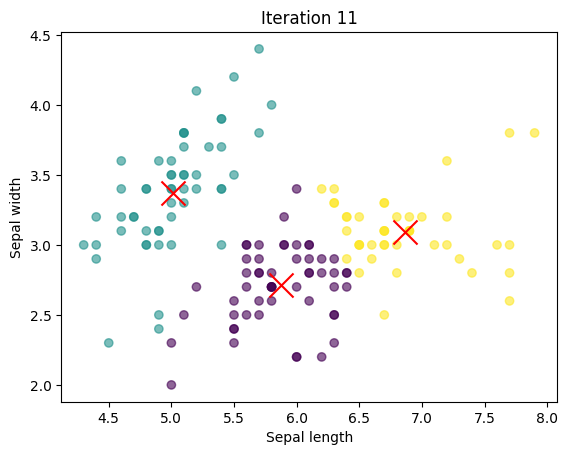

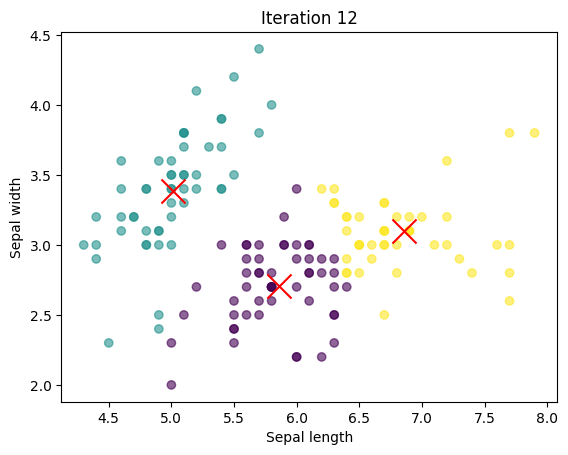

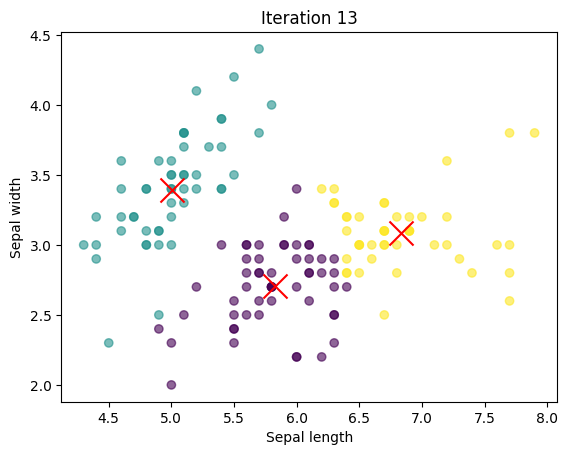

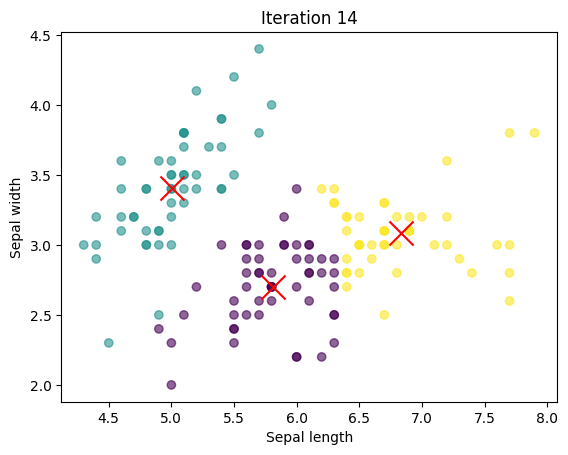

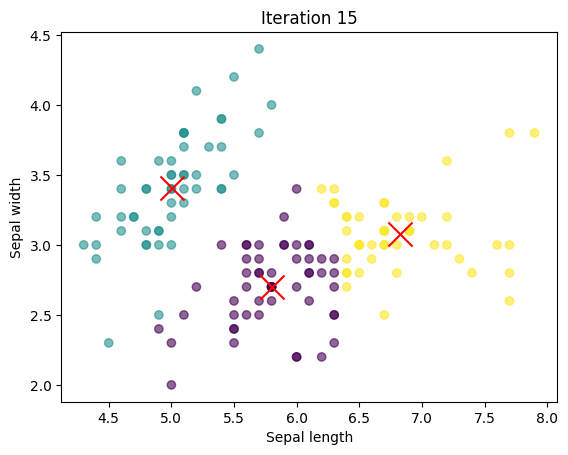

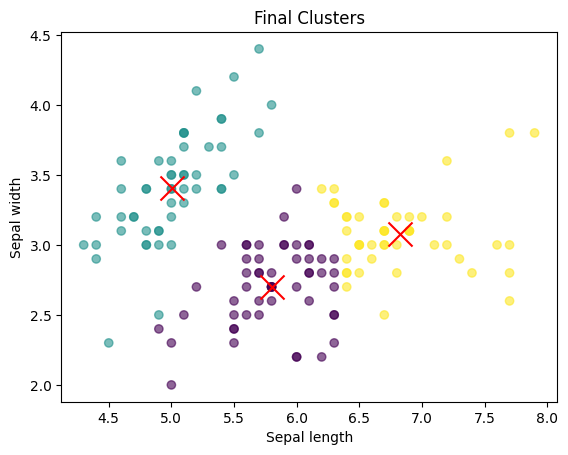

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

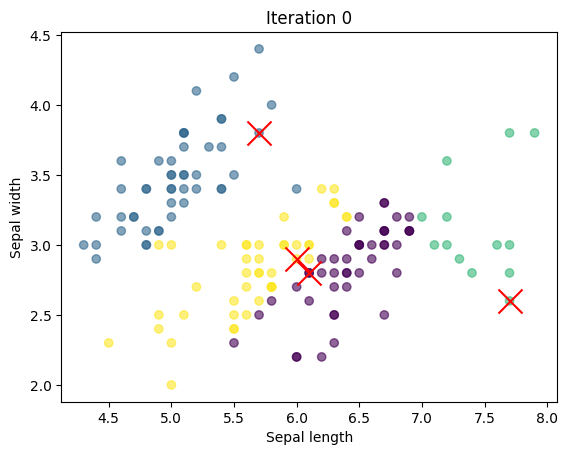

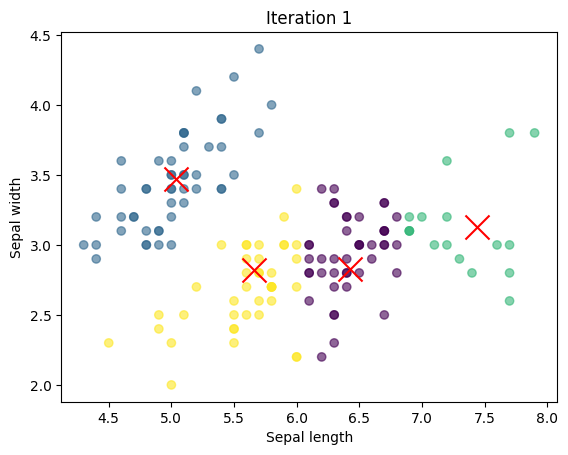

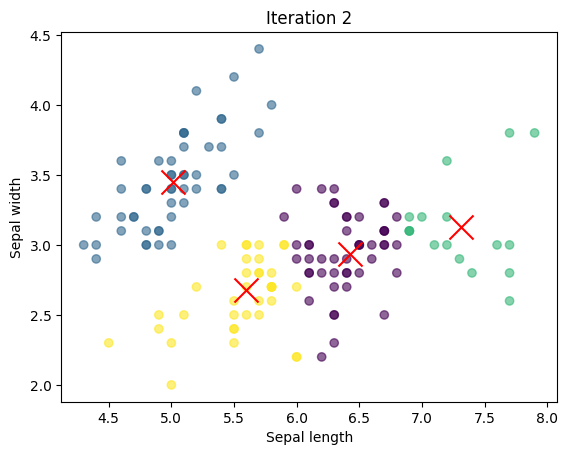

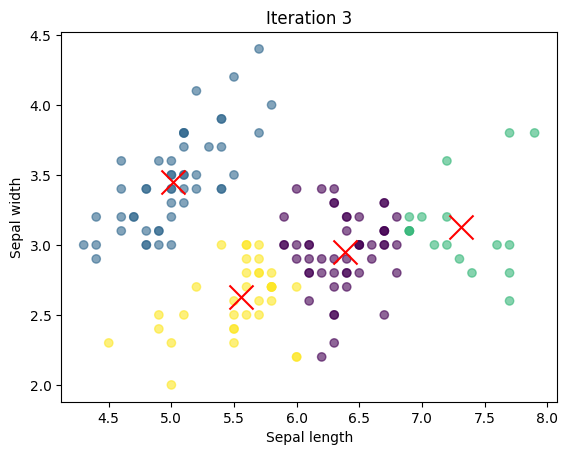

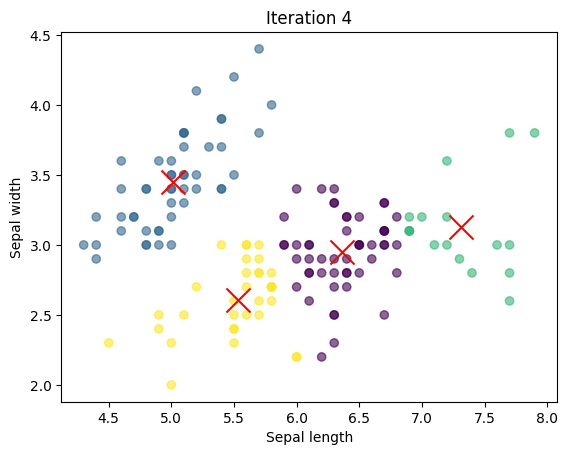

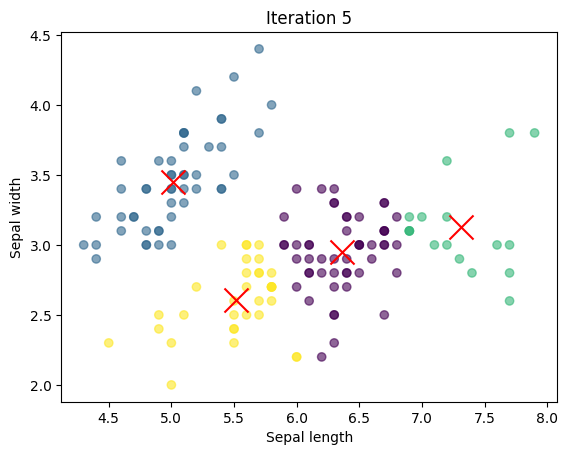

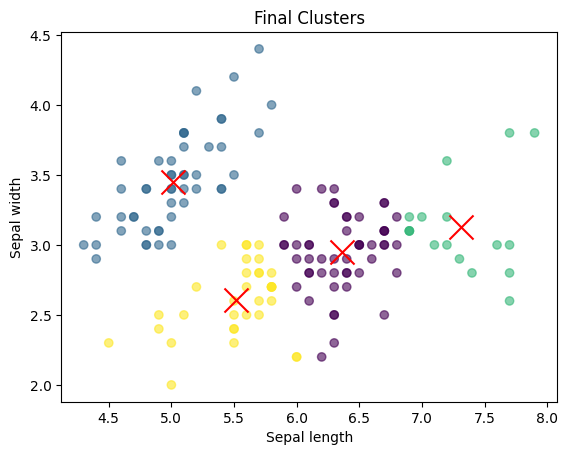

In [6]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(data)